## Apriori Method

Apriori is a classic algorithm used for frequent item set mining and association rule learning over relational databases. It's named Apriori because it uses prior knowledge of frequent itemset properties.

### Components of Apriori

Apriori introduces the concept of a frequent itemset, which is a set of items that appear together frequently in the database. It uses a level-wise search where k-frequent itemsets are used to find k+1 itemsets.

### How it Works

The Apriori algorithm works by first identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. It uses a "bottom up" approach, where frequent subsets are extended one item at a time (a step known as candidate generation), and groups of candidates are tested against the data. The algorithm terminates when no further successful extensions are found.

### Use Cases of Apriori

Apriori is typically used for association rule mining in various domains such as market basket analysis, web usage mining, intrusion detection, continuous production, and bioinformatics. It's particularly useful in scenarios where there is a need to find frequent patterns or associations in large databases.

### Advantages of Apriori

- **Simplicity**: Apriori is simple to understand and implement.
- **Generality**: It can be used with any transaction database where items are discrete and transactions are disjoint.

### Disadvantages of Apriori

- **Efficiency**: Apriori can be less efficient than other methods like FP-Growth because it involves the generation of candidate sets.
- **Memory usage**: It can use substantial memory if the itemsets in the database are long.

### Conclusion

Apriori is a fundamental tool for frequent itemset mining and association rule learning. It's unique in that it uses a level-wise, "bottom up" approach to extend frequent subsets one item at a time. However, like any algorithm, it requires careful tuning and validation to ensure optimal performance. It's also important to note that while Apriori is an effective tool for frequent itemset mining, it should be used as part of a broader suite of techniques in a comprehensive data mining strategy.

## Метод Apriori

Apriori - это классический алгоритм, используемый для поиска частых наборов элементов и обучения ассоциативным правилам в реляционных базах данных. Он называется Apriori, потому что использует предварительные знания о свойствах частых наборов элементов.

### Компоненты Apriori

Apriori вводит понятие частого набора элементов, который содержит все элементы, которые часто встречаются вместе в базе данных. Он использует поиск по уровням, где k-частые наборы элементов используются для поиска наборов элементов k+1.

### Как это работает

Алгоритм Apriori работает, сначала определяя частые отдельные элементы в базе данных и расширяя их до больших и больших наборов элементов, пока эти наборы элементов не появляются достаточно часто в базе данных. Он использует подход "снизу вверх", где частые подмножества расширяются на один элемент за раз (шаг, известный как генерация кандидатов), и группы кандидатов проверяются на данных. Алгоритм завершается, когда не найдено больше успешных расширений.

### Применение Apriori

Apriori обычно используется для поиска ассоциативных правил в различных областях, таких как анализ корзины покупок, майнинг веб-использования, обнаружение вторжений, непрерывное производство и биоинформатика. Он особенно полезен в сценариях, где требуется найти частые шаблоны или ассоциации в больших базах данных.

### Преимущества Apriori

- **Простота**: Apriori прост для понимания и реализации.
- **Универсальность**: Он может быть использован с любой транзакционной базой данных, где элементы дискретны, а транзакции не пересекаются.

### Недостатки Apriori

- **Эффективность**: Apriori может быть менее эффективен, чем другие методы, такие как FP-Growth, потому что он включает генерацию наборов кандидатов.
- **Использование памяти**: Он может использовать значительное количество памяти, если наборы элементов в базе данных длинные.

### Заключение

Apriori - это основной инструмент для поиска частых наборов элементов и обучения ассоциативным правилам. Он уникален тем, что использует поэтапный подход "снизу вверх" для расширения частых подмножеств по одному элементу за раз. Однако, как и любой алгоритм, он требует тщательной настройки и проверки для обеспечения оптимальной производительности. Также важно отметить, что, хотя Apriori является эффективным инструментом для поиска частых наборов элементов, он должен использоваться как часть более широкого набора техник в комплексной стратегии поиска данных.

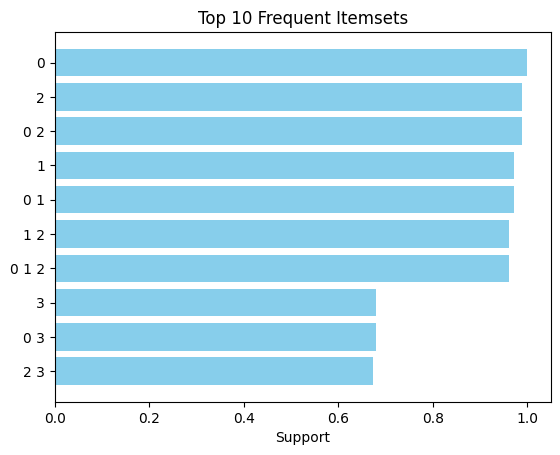

In [1]:
try:
    import pandas as pd
    from sklearn.datasets import load_wine
    from mlxtend.preprocessing import TransactionEncoder
    from mlxtend.frequent_patterns import apriori
    import matplotlib.pyplot as plt
except ImportError:
    !pip install pandas scikit-learn mlxtend matplotlib

class AprioriModel:
    """
    A class used to represent an Apriori Model.

    ...

    Attributes
    ----------
    min_support : float
        The minimum support for an itemset to be identified as frequent.
    transactions : list of lists
        The transactions data.

    Methods
    -------
    load_data():
        Loads the Wine data.
    find_frequent_itemsets():
        Finds the frequent itemsets in the transactions data.
    plot_frequent_itemsets(N):
        Plots the top N frequent itemsets.
    """

    def __init__(self, min_support=0.6):
        """
        Constructs all the necessary attributes for the AprioriModel object.
        """

        self.min_support = min_support
        self.transactions = []

    def load_data(self):
        """Loads the Wine data."""

        wine = load_wine()
        # Convert continuous data into discrete by converting each value to an integer
        self.transactions = wine.data.astype(int).tolist()

    def find_frequent_itemsets(self):
        """Finds the frequent itemsets in the transactions data."""

        te = TransactionEncoder()
        te_ary = te.fit(self.transactions).transform(self.transactions)
        df = pd.DataFrame(te_ary, columns=te.columns_)
        self.frequent_itemsets = apriori(df, min_support=self.min_support, use_colnames=True)

    def plot_frequent_itemsets(self, N):
        """Plots the top N frequent itemsets."""

        # Sort the itemsets by support and select the top N
        top_itemsets = self.frequent_itemsets.nlargest(N, 'support')

        plt.barh(range(N), top_itemsets['support'], color='skyblue')
        plt.yticks(range(N), [' '.join(map(str, itemset)) for itemset in top_itemsets['itemsets']])
        plt.xlabel('Support')
        plt.title('Top {} Frequent Itemsets'.format(N))
        plt.gca().invert_yaxis()  # Invert the y-axis to have the itemset with the highest support at the top
        plt.show()

# Example usage:
apriori_model = AprioriModel()
apriori_model.load_data()
apriori_model.find_frequent_itemsets()
apriori_model.plot_frequent_itemsets(10)


The plot visualizes the top 10 frequent itemsets discovered by the Apriori algorithm in the Wine dataset. Each bar in the plot represents a frequent itemset, and the length of the bar represents the support of the itemset, which is the proportion of transactions in the dataset that contain the itemset. The itemsets are represented as strings of integers, where each integer corresponds to a discretized feature value from the Wine dataset. The itemsets are sorted by support, so the itemset with the highest support is at the top of the plot. This visualization can help you understand which itemsets are most common in the dataset. Please note that the actual interpretation of the itemsets depends on the meaning of the feature values in the Wine dataset.

Диаграмма визуализирует 10 наиболее частых наборов элементов, обнаруженных алгоритмом Apriori в наборе данных Wine. Каждый столбец на диаграмме представляет собой частый набор элементов, а длина столбца представляет поддержку набора элементов, которая является долей транзакций в наборе данных, содержащих набор элементов. Наборы элементов представлены в виде строк целых чисел, где каждое целое число соответствует дискретизированному значению признака из набора данных Wine. Наборы элементов отсортированы по поддержке, поэтому набор элементов с наибольшей поддержкой находится в верхней части диаграммы. Эта визуализация может помочь вам понять, какие наборы элементов наиболее распространены в наборе данных. Обратите внимание, что фактическая интерпретация наборов элементов зависит от значения признаков в наборе данных Wine.